In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
lows_a2a = []
highs_a2a = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/synth_a2a_tb_beta_96/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_a2a.extend(df[:10_000]["fr_0"])
    highs_a2a.extend(df[-10_000:]["fr_0"])
    cnx.close()

In [3]:
lows_a2a_p = []
highs_a2a_p = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/synth_a2a_tb_beta_96/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_a2a_p.extend(df[:10_000]["pref_0"])
    highs_a2a_p.extend(df[-10_000:]["pref_0"])
    cnx.close()

In [4]:
lows_ras = []
highs_ras = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/synth_a2a_tb_beta_96/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_ras.extend(df[:10_000]["fr_1"])
    highs_ras.extend(df[-10_000:]["fr_1"])
    cnx.close()

In [5]:
lows_ras_p = []
highs_ras_p = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/synth_a2a_tb_beta_96/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_ras_p.extend(df[:10_000]["pref_1"])
    highs_ras_p.extend(df[-10_000:]["pref_1"])
    cnx.close()

In [6]:
lows_sas = []
highs_sas = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/synth_a2a_tb_beta_96/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_sas.extend(df[:10_000]["fr_2"])
    highs_sas.extend(df[-10_000:]["fr_2"])
    cnx.close()

In [7]:
lows_sas_p = []
highs_sas_p = []
for i in range(8):
    cnx = sqlite3.connect(f'/home/julius/thesis/rxitect/logs/mogfn/synth_a2a_tb_beta_96/generated_mols_{i}.db')
    df = pd.read_sql_query("SELECT * FROM results2", cnx)
    lows_sas_p.extend(df[:10_000]["pref_2"])
    highs_sas_p.extend(df[-10_000:]["pref_2"])
    cnx.close()

In [ ]:
a = pd.DataFrame(pd.Series(lows_a2a), columns=["A2A"])
b = pd.DataFrame(pd.Series(lows_ras), columns=["RA Score"])
c = pd.DataFrame(pd.Series(lows_sas), columns=["SA Score"])
d = pd.concat([a, b, c], axis=1)

In [ ]:
e = pd.DataFrame(pd.Series(highs_a2a), columns=["A2A"])
f = pd.DataFrame(pd.Series(highs_ras), columns=["RA Score"])
g = pd.DataFrame(pd.Series(highs_sas), columns=["SA Score"])
h = pd.concat([e, f, g], axis=1)

In [ ]:
i = pd.concat([d, h], axis=0)
i.reset_index(inplace=True)


In [ ]:
i["index"].iloc[0:80_000] = "First 80K"

In [ ]:
i["index"].iloc[-80_000:] = "Last 80K"

In [ ]:
i.rename(columns={"index":"samples"}, inplace=True)
i

In [ ]:
g = sns.pairplot(i, hue="samples", kind="kde")

In [ ]:
fig = g.fig

In [ ]:
fig.savefig("../reports/synth_a2a_pairplot_first_v_last_80K_kde.png")

In [ ]:
sns.load_dataset("penguins")

In [ ]:
sns.pairplot(data=d)
sns.pairplot(data=h)

In [ ]:
sns.kdeplot(lows, fill=True)
sns.kdeplot(highs, fill=True)

In [ ]:
reward_history = (df[df["r"] > 0]["r"]).to_numpy()

In [ ]:
len(reward_history)

In [ ]:
sns.lineplot(df["r"])

In [ ]:
sns.regplot(x=np.arange(20_000), y=df[:20000]["r"], label="first 20K")
sns.regplot(x=np.arange(20_000), y=df[-20000:]["r"], label="last 20K")

In [2]:
import torch

In [9]:
pareto = torch.load("../logs/mogfn/synth_a2a_tb_beta_96/pareto.pt")

In [10]:
pf = pareto["pareto_front"]

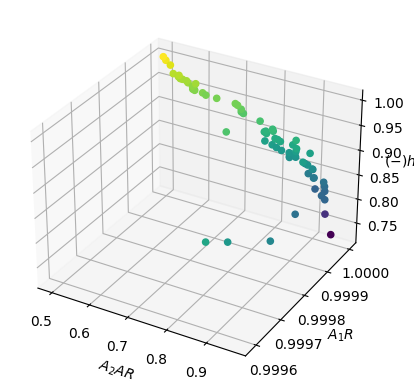

In [11]:
axes = plt.axes(projection="3d")
axes.scatter3D(pf[:,0], pf[:,1], pf[:,2], c=pf[:,2], alpha=1)
axes.set_xlabel("$A_{2}AR$")
axes.set_ylabel("$A_{1}R$")
axes.set_zlabel("$(-)hERG$")
axes.yaxis.set_rotate_label(False)
axes.zaxis.set_rotate_label(False)
# plt.savefig("../reports/drugex_v2_beta_96_trajectory_balance_5000.png")
plt.show()
# axes.plot_surface(x1, y1, z1)
# plt.show()

In [3]:
syntha2a_gfn = torch.load("../logs/mogfn/synth_a2a_tb_beta_96/model_state.pt")

In [13]:
syntha2a_gfn.keys()

dict_keys(['models_state_dict', 'hps'])

In [13]:
hps = syntha2a_gfn['hps']

In [14]:
hps

{'bootstrap_own_reward': False,
 'learning_rate': 0.0001,
 'global_batch_size': 128,
 'num_emb': 128,
 'num_layers': 6,
 'tb_epsilon': None,
 'illegal_action_logreward': -75,
 'reward_loss_multiplier': 1,
 'temperature_sample_dist': 'uniform',
 'temperature_dist_params': '(96, 96)',
 'weight_decay': 1e-08,
 'num_data_loader_workers': 8,
 'momentum': 0.9,
 'adam_eps': 1e-08,
 'lr_decay': 20000,
 'Z_lr_decay': 20000,
 'clip_grad_type': 'norm',
 'clip_grad_param': 10,
 'random_action_prob': 0.05,
 'num_cond_dim': 35,
 'sampling_tau': 0.95,
 'seed': 0,
 'preference_type': 'seeded_many',
 'algo': 'TB',
 'log_dir': '/home/julius/thesis/rxitect/logs/mogfn/synth_a2a_tb_beta_96',
 'num_training_steps': 5000,
 'validate_every': 250,
 'valid_sample_cond_info': False,
 'mask_invalid_rewards': False}

In [15]:
state_dict = syntha2a_gfn['models_state_dict'][0]

In [16]:
from rxitect.gflownet.models.frag_graph_gfn import FragBasedGraphGFN
from rxitect.gflownet.contexts.frag_graph_context import FragBasedGraphContext
from rxitect.gflownet.utils.graph_sampler import GraphSampler
from rxitect.gflownet.contexts.envs.graph_building_env import GraphBuildingEnv

In [17]:
ctx = FragBasedGraphContext(num_cond_dim=hps["num_cond_dim"])

In [18]:
gfn = FragBasedGraphGFN(ctx=ctx, estimate_init_state_flow=True)

In [19]:
gfn.load_state_dict(state_dict=state_dict)

<All keys matched successfully>

In [20]:
gfn.eval()

FragBasedGraphGFN(
  (transf): GraphTransformer(
    (x2h): Sequential(
      (0): Linear(in_features=106, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=128, out_features=128, bias=True)
    )
    (e2h): Sequential(
      (0): Linear(in_features=12, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=128, out_features=128, bias=True)
    )
    (c2h): Sequential(
      (0): Linear(in_features=35, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=128, out_features=128, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=128, out_features=128, bias=True)
    )
    (graph2emb): ModuleList(
      (0)

In [21]:
env = GraphBuildingEnv(ctx=ctx)
sampler = GraphSampler(ctx, env, max_steps=None, max_nodes=9, rng=np.random.default_rng(123))

In [23]:
from rxitect.gflownet.tasks.a import thermometer
from torch.distributions import Dirichlet
from typing import Optional

def generate_encoded_ci(n: int, num_prefs: int, rexp_distribution = (96, 96), rng = np.random.default_rng(123), preferences: Optional[torch.Tensor] = None):
    beta = rng.uniform(*rexp_distribution, n).astype(np.float32)
    upper_bound = rexp_distribution[1]
    beta_enc = thermometer(torch.tensor(beta), 32, 0, upper_bound)  # TODO: hyperparameters
    if preferences is None:
        m = Dirichlet(torch.FloatTensor([1.] * num_prefs))
        preferences = m.sample([n])
    encoding = torch.cat([beta_enc, preferences], 1)
    info = {'beta': torch.tensor(beta), 'encoding': encoding, 'preferences': preferences}
    return info

In [27]:
n_samples = 1_000
ci = generate_encoded_ci(n=n_samples, num_prefs=3, preferences=torch.tensor([[1.0, 0.0, 0.0]] * n_samples))
res = sampler.sample_from_model(model=gfn, n=n_samples, cond_info=ci["encoding"], device="cpu")

In [28]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
from rdkit.Chem import Draw
from rdkit.Chem.Draw import DrawingOptions
IPythonConsole.ipython_useSVG=False  #< set this to False if you want PNGs instead of SVGs

In [29]:
def _replenish_stems(g, ctx):
    if hasattr(ctx, "frags_stems"):
        for i in g.nodes:
            g.nodes[i]['stems'] = ctx.frags_stems[g.nodes[i]['v']]
    else:
        raise ValueError("This context does not use stems")

In [31]:
def sampled_trajs_to_mols(trajs, ctx):
    graphs = []
    for t in trajs:
        G = t["traj"][-1][0]
        _replenish_stems(G, ctx)
        graphs.append(G)
    mols = [ctx.graph_to_mol(G) for G in graphs]
    return mols

In [32]:
mols = sampled_trajs_to_mols(res, ctx)

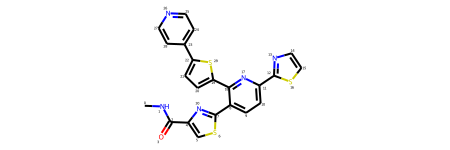

In [33]:
Chem.MolFromSmiles(Chem.MolToSmiles(mols[21]))

In [34]:
from rxitect.scorers.a2ascore import Predictor

enhanced_fps = Predictor.calc_fp(mols=mols)
a2a = Predictor(path="../models/RF_REG_CHEMBL251.pkg")
a2ascore_preds = a2a(enhanced_fps)

<AxesSubplot: ylabel='Count'>

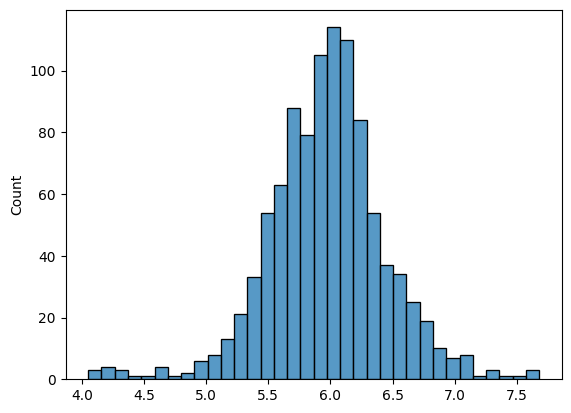

In [35]:
sns.histplot(a2ascore_preds)

In [ ]:
g0 = res[0]["traj"][-1][0]
replenish_stems(g0, ctx)

In [ ]:
ctx.graph_to_mol(g0)

In [ ]:
g0

In [ ]:
pref0 = df[-20_000:]["pref_2"]
fr0 = df[-20_000:]["fr_2"]

In [ ]:
sns.scatterplot(x=pref0, y=fr0)

In [ ]:
sns.distplot(df[:20_000]["fr_2"])
sns.distplot(df[-20_000:]["fr_2"])

In [ ]:
# sns.lineplot(df96["fr_0"])
sns.regplot(x=df96.index, y=df96["fr_0"], fit_reg=True, line_kws={"color": "red"})

In [ ]:
data = df[-10_000:]
# g = sns.pairplot(data[["fr_0", "fr_1", "fr_2"]])
# sns.scatterplot(x=data[["fr_0", "fr_1", "fr_2"]], y=data[["pref_0", "pref_1", "pref_2"]])
sns.scatterplot(x=data["fr_1"], y=data["pref_1"])
sns.histplot(df["fr_0"], stat='count')
# sns.pairplot(data["fr_1"])

In [ ]:
g = sns.pairplot(data[["fr_0", "fr_1", "fr_2"]])
# g = sns.pairplot(data_2[["fr_0", "fr_1", "fr_2"]], kind="kde")
# g.axes[0,0].set_xlim((0, 1))
# g.axes[0,1].set_xlim((0, 1))
# g.axes[0,2].set_xlim((0, 1))
# g.axes[0,0].set_ylim((0, 1))
# g.axes[1,1].set_ylim((0, 1))
# g.axes[2,2].set_ylim((0, 1))
# g.map_upper(sns.scatterplot)
# ax2 = plt.twinx()
# sns.scatterplot(x=data["fr_0"], y=data["pref_0"], color="r", ax=ax2)

In [ ]:
sns.scatterplot(x=data["fr_1", "fr_2"], y=data["pref_1", "pref_2"])

In [ ]:
sns.regplot(x=data.index, y="fr_1", data=data, fit_reg=True, line_kws={"color": "red"})

In [ ]:
0.8**32

In [ ]:
import math
math.log(32, 0.0007922816251426448)

In [ ]:
math.log(0.0007922816251426448, 32)

In [ ]:
import torch

In [ ]:
pareto = torch.load("../logs/moo/drugex_v2_tb/pareto.pt")

In [ ]:
sns.displot(pareto["pareto_front"])

In [ ]:
import torch

In [ ]:
diri = torch.distributions.Dirichlet(torch.FloatTensor([5., 1., 1.]))

In [ ]:
diri.sample([5])

In [ ]:
stuff = torch.load("/home/julius/thesis/rxitect/logs/moo/synth_a2a_tb/model_state.pt")

In [ ]:
hps = stuff["hps"]

In [ ]:
hps

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde as kde
from matplotlib.colors import Normalize
from matplotlib import cm

N = 10000
mean = [0,0]
cov = [[2,2],[0,2]]

# samples = np.random.multivariate_normal(mean,cov,N).T
samples = np.concatenate([[highs_a2a], [highs_a2a_p]])
densObj = kde( samples )

def makeColours( vals ):
    colours = np.zeros( (len(vals),3) )
    norm = Normalize( vmin=vals.min(), vmax=vals.max() )

    #Can put any colormap you like here.
    colours = [cm.ScalarMappable( norm=norm, cmap='jet').to_rgba( val ) for val in vals]

    return colours

colours = makeColours( densObj.evaluate( samples ) )

plt.scatter( samples[0], samples[1], color=colours )
plt.show()

In [ ]:
samples = np.concatenate([[lows_a2a], [lows_a2a_p]])
densObj = kde( samples )

def makeColours( vals ):
    colours = np.zeros( (len(vals),3) )
    norm = Normalize( vmin=vals.min(), vmax=vals.max() )

    #Can put any colormap you like here.
    colours = [cm.ScalarMappable( norm=norm, cmap='jet').to_rgba( val ) for val in vals]

    return colours

colours = makeColours( densObj.evaluate( samples ) )

plt.scatter( samples[0], samples[1], color=colours )
plt.show()

In [ ]:
samples = np.concatenate([[highs_ras], [highs_ras_p]])
densObj = kde( samples )

def makeColours( vals ):
    colours = np.zeros( (len(vals),3) )
    norm = Normalize( vmin=vals.min(), vmax=vals.max() )

    #Can put any colormap you like here.
    colours = [cm.ScalarMappable( norm=norm, cmap='jet').to_rgba( val ) for val in vals]

    return colours

colours = makeColours( densObj.evaluate( samples ) )

plt.scatter( samples[0], samples[1], color=colours)
plt.xlabel = "RA Score"
plt.ylabel = "preference ($\omega$)"
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.savefig("../reports/a2a_synth_rascore_pref_relationship.png")
plt.show()

In [ ]:
import matplotlib.pyplot as mpl

In [ ]:
np.mean(highs_a2a_p)

In [ ]:
plt.scatter(x=highs_ras, y=highs_ras_p, alpha=0.1)

In [ ]:
plt.scatter(x=highs_sas, y=highs_sas_p)